                                                                                                         Saurabh Bajoria
                                                                                                         UBid: sbajoria
                                                                                                         Person no:50208005

**CSE 4/587 Data Intensive Computing**
====================
***LAB1: Data Clients and Information Servers***
---------------------------------------
                                                                                                       

*Problem1*
--------------------------------------



Data client processing: Obtain and group tweets by location and plot the groups by size on the map of the USA

- Note:
 1. Extracted tweets for topic "#superbowl"
 2. Used CSV to store and retrieve data
 3. Divided the map into bins, and took the average location to plot a point depending on the number of tweets in that bin

 
 
 **References: 
 1. http://stackoverflow.com/
 2. Official documentations of twitteR, ggmap, ggplot, RSQLite
 3. https://www.r-bloggers.com/
 

- Importing Libraries required

In [ ]:
library(RSQLite)
library(ggmap)
library(readr)
library(twitteR)
library(ggplot2)
library(maps)

- Tweet topic: *superbowl*

In [ ]:
text="#superbowl"

- Authentication for Twitter API, required to extract tweets from Twitter

In [ ]:
consumer_key <-'0rnEKoYQGRaumOd70HSbwpSM6'
consumer_secret <- 'kmqdpKcMHsOqeVY2MgSTXMPoZsLTLlyrxlIEmvJPb7ULp6Gjh6'
access_token <- '805074888419635202-i0IlVwS7UR7vq7sMg9BSY431VyJ2Tyj'
access_secret <- 'P089q9h1GHxw9ER9UCB5ZqM4Y1ng7uH5VmaT8aubK6drt'
setup_twitter_oauth(consumer_key,consumer_secret,access_token,access_secret)

- Issuing a search on Twitter based on the search string supplied

In [ ]:
tweetList <- searchTwitter(text,n=40000)

- Converting the list type *tweetList* to a Data frame *tweetsDf*

In [ ]:
tweetsDf<- twListToDF(tweetList)

- Using the *screenName* column of the data frame, extracting the list of user information using lookup. Also, converting the list to a data frame using twListToDf

In [ ]:
userInfoDf <- twListToDF(lookupUsers(tweetsDf$screenName))

- Removing the rows containing NA values

In [ ]:
userInfoDf <- na.omit(userInfoDf)

- Writing the UserInfo and the tweets in  CSV(Comma Seperated values) format files UserInfo and Tweets respectively

In [ ]:
write.csv(tweetsDf, file="Tweets.csv")
write.csv(userInfoDf, file="UserInfo.csv")

- Read all the user information from the CSV file into a data frame *userInfoDf*

In [ ]:
userInfoDf <- read.csv("UserInfo.csv", header = TRUE, sep = ",", quote = "\"",
         dec = ".", fill = TRUE)

1. Taking the first 2500 locations from the userInfoDf into a list *locations*
2. Getting the geocodes of the locations into a dataframe *locationCodes*

*To be run on day 1*

In [ ]:
locations<- userInfoDf[1:10,]$location
locationCodes <- geocode(as.character(locations))
write.table(locationCodes, file="LocationCodes.csv", sep=",",row.names=F)

1. Taking the next 2500 locations from the userInfoDf into a list *locations*
2. Getting the geocodes of the locations and appending it to the dataframe *locationCodes*

    *(Doing it in batches of 2500 because of the limit of Google API)*
    
*To be run on day 2*

In [ ]:
locations<- userInfoDf[2500:2510,]$location
locationCodes <- geocode(as.character(locations))
write.table(locationCodes, file="LocationCodes.csv",sep=",", col.names=F, row.names=F,append=T)

- Read the LocationCodes from the CSV to a dataframe *locationCodes*

In [ ]:
locationCodes <- read.csv("LocationCodes.csv", header = TRUE, sep = ",", quote = "\"",
         dec = ".", fill = TRUE)

- Creating a new dataframe

In [ ]:
df = data.frame(lat = character(0), lon = character(0), freq = numeric(0));

- Dividing the Map of USA into blocks and mapping the points in those blocks to a common point

In [ ]:
for(i in 1:nrow(locationCodes))
{
if(locationCodes[i,]$lon>=-125 && locationCodes[i,]$lon<=-117 && locationCodes[i,]$lat>=43 && locationCodes[i,]$lat<48)
{ 
 newrow = data.frame(lat=-121.00,lon=45.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-125 && locationCodes[i,]$lon<=-117 && locationCodes[i,]$lat>=37 && locationCodes[i,]$lat<43)
{ 
 newrow = data.frame(lat=-121.00,lon=39.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-125 && locationCodes[i,]$lon<=-117 && locationCodes[i,]$lat>=32 && locationCodes[i,]$lat<37)
{ 
 newrow = data.frame(lat=-116.00,lon=34.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-117 && locationCodes[i,]$lon<=-110 && locationCodes[i,]$lat>=43 && locationCodes[i,]$lat<48)
{ 
 newrow = data.frame(lat=-113.50,lon=45.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-117 && locationCodes[i,]$lon<=-110 && locationCodes[i,]$lat>=37 && locationCodes[i,]$lat<43)
{ 
 newrow = data.frame(lat=-113.50,lon=39.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-117 && locationCodes[i,]$lon<=-110 && locationCodes[i,]$lat>=32 && locationCodes[i,]$lat<37)
{ 
 newrow = data.frame(lat=-113.50,lon=34.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-110 && locationCodes[i,]$lon<=-103 && locationCodes[i,]$lat>=43 && locationCodes[i,]$lat<48)
{ 
 newrow = data.frame(lat=-106.50,lon=45.50,freq=1)
 df <- rbind(df, newrow)
} 
else if(locationCodes[i,]$lon>=-110 && locationCodes[i,]$lon<=-103 && locationCodes[i,]$lat>=37 && locationCodes[i,]$lat<43)
{ 
 newrow = data.frame(lat=-106.50,lon=39.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-110 && locationCodes[i,]$lon<=-103 && locationCodes[i,]$lat>=32 && locationCodes[i,]$lat<37)
{ 
 newrow = data.frame(lat=-106.50,lon=34.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-103 && locationCodes[i,]$lon<=-97 && locationCodes[i,]$lat>=43 && locationCodes[i,]$lat<48)
{ 
 newrow = data.frame(lat=-100.00,lon=45.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-103 && locationCodes[i,]$lon<=-97 && locationCodes[i,]$lat>=37 && locationCodes[i,]$lat<43)
{ 
 newrow = data.frame(lat=-100.00,lon=39.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-103 && locationCodes[i,]$lon<=-97 && locationCodes[i,]$lat>=32 && locationCodes[i,]$lat<37)
{ 
 newrow = data.frame(lat=-100.00,lon=34.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-97 && locationCodes[i,]$lon<=-90 && locationCodes[i,]$lat>=43 && locationCodes[i,]$lat<48)
{ 
 newrow = data.frame(lat=-93.50,lon=45.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-97 && locationCodes[i,]$lon<=-90 && locationCodes[i,]$lat>=37 && locationCodes[i,]$lat<43)
{ 
 newrow = data.frame(lat=-93.50,lon=39.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-97 && locationCodes[i,]$lon<=-90 && locationCodes[i,]$lat>=32 && locationCodes[i,]$lat<37)
{ 
 newrow = data.frame(lat=-93.50,lon=34.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-90 && locationCodes[i,]$lon<=-83 && locationCodes[i,]$lat>=43 && locationCodes[i,]$lat<48)
{ 
 newrow = data.frame(lat=-86.50,lon=45.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-90 && locationCodes[i,]$lon<=-83 && locationCodes[i,]$lat>=37 && locationCodes[i,]$lat<43)
{ 
 newrow = data.frame(lat=-86.50,lon=39.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-90 && locationCodes[i,]$lon<=-83 && locationCodes[i,]$lat>=32 && locationCodes[i,]$lat<37)
{ 
 newrow = data.frame(lat=-86.50,lon=34.50,freq=1)
 df <- rbind(df, newrow)
}

else if(locationCodes[i,]$lon>=-83 && locationCodes[i,]$lon<=-77 && locationCodes[i,]$lat>=37 && locationCodes[i,]$lat<43)
{ 
 newrow = data.frame(lat=-80.00,lon=39.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-83 && locationCodes[i,]$lon<=-77 && locationCodes[i,]$lat>=32 && locationCodes[i,]$lat<37)
{ 
 newrow = data.frame(lat=-80.00,lon=34.50,freq=1)
 df <- rbind(df, newrow)
}

else if(locationCodes[i,]$lon>=-77 && locationCodes[i,]$lon<=-70 && locationCodes[i,]$lat>=37 && locationCodes[i,]$lat<43)
{ 
 newrow = data.frame(lat=-73.50,lon=39.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-77 && locationCodes[i,]$lon<=-70 && locationCodes[i,]$lat>=32 && locationCodes[i,]$lat<37)
{ 
 newrow = data.frame(lat=-73.50,lon=34.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-70 && locationCodes[i,]$lon<=-63 && locationCodes[i,]$lat>=37 && locationCodes[i,]$lat<43)
{ 
 newrow = data.frame(lat=-66.50,lon=44.50,freq=1)
 df <- rbind(df, newrow)
}
else if(locationCodes[i,]$lon>=-70 && locationCodes[i,]$lon<=-63 && locationCodes[i,]$lat>=32 && locationCodes[i,]$lat<37)
{ 
 newrow = data.frame(lat=-66.50,lon=34.50,freq=1)
 df <- rbind(df, newrow)
}
    else if(locationCodes[i,]$lon>=-105 && locationCodes[i,]$lon<=-90 && locationCodes[i,]$lat>=26 && locationCodes[i,]$lat<32)
{ 
 newrow = data.frame(lat=-98.50,lon=27,freq=1)
 df <- rbind(df, newrow)
}
}


- Aggregating(Grouping) and getting the frequency of the Latitude and Longitude Pair and storing it in a dataframe *frequency*

In [ ]:
frequency <- aggregate(numeric(nrow(df)), df[c("lat", "lon")], length)

- Writing the Location details with frequency in a CSV(Comma Seperated values) format file *Frequency*

In [ ]:
write.csv(frequency, file="Frequency.csv")

- Read the Location details with frequency in a dataframe *frequency*

In [ ]:
frequency <- read.csv("Frequency.csv", header = TRUE, sep = ",", quote = "\"",
         dec = ".", fill = TRUE)

- Calculating the maximum of the frequencies

 *Used for varying the size of the points to be plotted on the map*

In [ ]:
max <- max(frequency$x)
temp <- max/10

1. Getting the Map of USA from source *Google*
2. Plotting the points from the *frequency* dataframe with varying size depending on the number of times that location is encountered

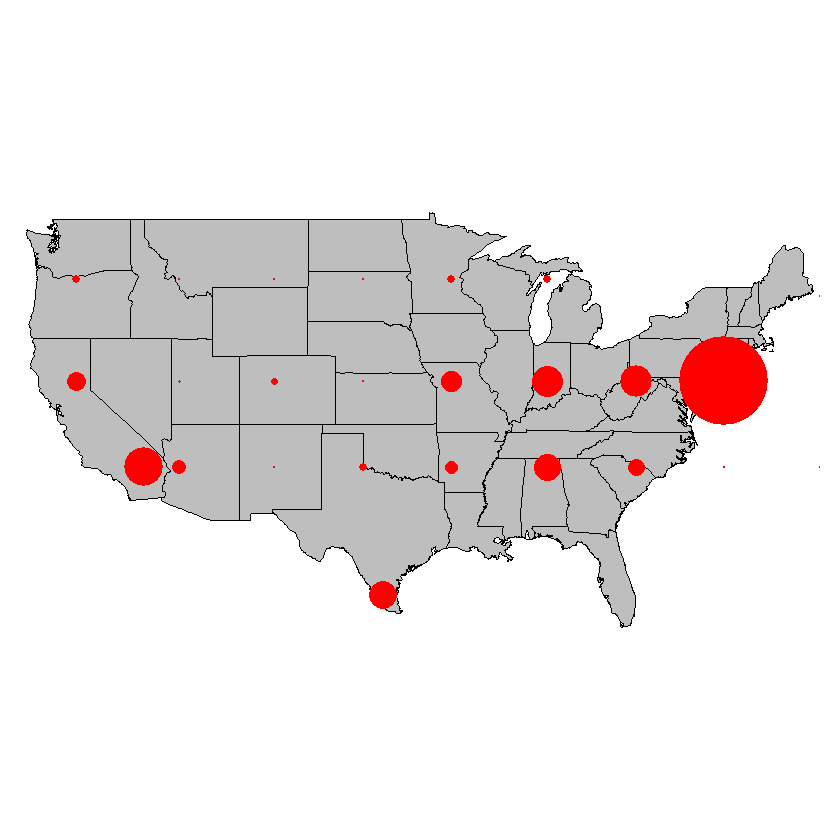

In [44]:
map("state", fill=TRUE, col="grey", bg="white", mar=c(0,0,0,0))
points(frequency$lat, frequency$lon, col="red", pch=16,cex=(frequency$x/temp))
